## I. Data Preparation

In this notebook, we shall prepare data to be used for inference.

We shall start by importing the libraries and data. Then I shall explore the structure of the data set and proceed to:
* Feature engineering (turning non numerical variables into categorical and creating dummies)
* Outlier handling

Finally, I save the modified dataset for creating and testing a model for inference purposes. 

### 1.Importing libraries

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from glob import glob


%matplotlib inline
%matplotlib inline

### 2. Import datasets 

In [2]:
df = pd.read_csv("adult.data", header=None,  delimiter= ",")

df.shape

(32561, 15)

In [3]:
# REmove duplicate columns if any
#Remove duplicate columns
_, i = np.unique(df.columns, return_index=True)
df=df.iloc[:, i]
df.shape

(32561, 15)

We can see there were no duplicate rows

### 3. Data Exploration

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [6]:
df.head(5)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# see if there is any missing value
df.isna().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

In [8]:
df.dtypes

Age               int64
WorkClass        object
fnlwgt            int64
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

Clearly, we have to set up a red flag for the variable race. As it could be unethical to be used depending on the purpose of this study. Since this study is for learning purposes only, we can use it. 

### 3.1 Label exploration

Let's look at the label, and turn it into  0/1 values

In [9]:
df['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [10]:
df['Income']= df['Income'].str.replace("<=50K", "0") 
df['Income']= df['Income'].str.replace(">50K", "1") 

df['Income'].value_counts()

 0    24720
 1     7841
Name: Income, dtype: int64

Data is slightly imbalanced, so I shall undertake action to balance it

In [11]:
df['Income'].astype('category')

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         1
8         1
9         1
10        1
11        1
12        0
13        0
14        1
15        0
16        0
17        0
18        0
19        1
20        1
21        0
22        0
23        0
24        0
25        1
26        0
27        1
28        0
29        0
         ..
32531     0
32532     1
32533     1
32534     0
32535     0
32536     1
32537     0
32538     1
32539     1
32540     0
32541     0
32542     0
32543     0
32544     0
32545     1
32546     0
32547     0
32548     0
32549     0
32550     0
32551     0
32552     0
32553     0
32554     1
32555     0
32556     0
32557     1
32558     0
32559     0
32560     1
Name: Income, Length: 32561, dtype: category
Categories (2, object): [0, 1]

### 3. Feature visualization and engineering

#### 3.1 Feature selection

In [12]:
#show the different columns in the dataset
df.columns

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')

#### 3.2 Feature Engineering

In [13]:
# view column types
df.dtypes

Age               int64
WorkClass        object
fnlwgt            int64
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

I need to turn the object type variables into categorical. Eventually, if there aren't too many values in an single category, I could aggregate them.  

In [14]:
# See values per categorical value
df['WorkClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

For the 'WorkClass'feature, I shall have to group some categories (few entries) and rename some categories

In [15]:
# aggregate categories WorkClass column

df["WorkClass"]= df["WorkClass"].str.replace("?", "Unknown") 
df["WorkClass"]= df["WorkClass"].str.replace("Without-pay", "WP-NW") 
df["WorkClass"]= df["WorkClass"].str.replace("Never-worked", "WP-NW") 


df['WorkClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 WP-NW                  21
Name: WorkClass, dtype: int64

In [16]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [17]:
df['MaritalStatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: MaritalStatus, dtype: int64

In [18]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df["Occupation"]= df["Occupation"].str.replace("?", "Unknown") 
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [21]:
df['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [22]:
# Making variables more politically correct
df["Race"]= df["Race"].str.replace("Black", "African-American") 
df['Race'].value_counts()

 White                 27816
 African-American       3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [23]:
df['Gender'].value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

In [24]:
df['NativeCountry'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

To understand better the numerical variables, I shall plot their histograms

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

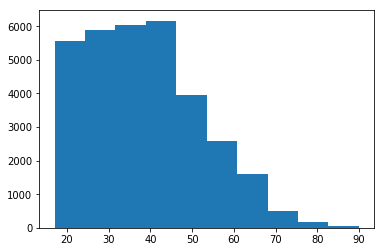

In [25]:
plt.hist(df.Age, bins =10)


In [26]:
#turn age from numerical into categorical by aggregating age groups
def Age_xform(al):
    if al < 20: return 'below 20'
    elif al <30: return '21-30'
    elif al <40: return '31-40'
    elif al <50: return '41-50'
    elif al <40: return '51-60'
    elif al <40: return '61-70'
    else: return 'abvove 70'

df["Age"] = df['Age'].map(Age_xform)


df["Age"].value_counts()

31-40        8613
21-30        8054
41-50        7175
abvove 70    7062
below 20     1657
Name: Age, dtype: int64

(array([ 1198.,  3055., 20241.,  8067.]),
 array([ 1.  ,  4.75,  8.5 , 12.25, 16.  ]),
 <a list of 4 Patch objects>)

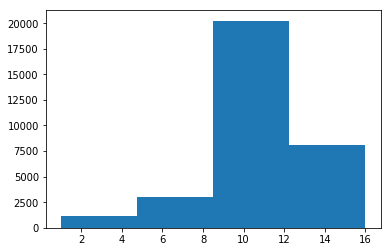

In [27]:
plt.hist(df.EducationNum, bins =4)


In [28]:
#turn Education from numerical into categorical by aggregating age groups
def EducationNum_xform(al):
    if al < 5: return 'less 5'
    elif al <9: return '6-9'
    elif al <12: return '10-12'
    else: return 'above 13'

df["EducationNum"] = df['EducationNum'].map(EducationNum_xform)


df["EducationNum"].value_counts()

10-12       19174
above 13     9134
6-9          3055
less 5       1198
Name: EducationNum, dtype: int64

(array([3.0913e+04, 8.7800e+02, 1.5700e+02, 3.6000e+02, 3.8000e+01,
        4.9000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0.  ,  4999.95,  9999.9 , 14999.85, 19999.8 , 24999.75,
        29999.7 , 34999.65, 39999.6 , 44999.55, 49999.5 , 54999.45,
        59999.4 , 64999.35, 69999.3 , 74999.25, 79999.2 , 84999.15,
        89999.1 , 94999.05, 99999.  ]),
 <a list of 20 Patch objects>)

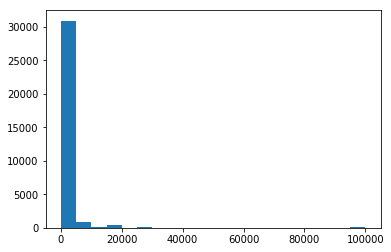

In [29]:
plt.hist(df.CapitalGain, bins =20)

(array([3.1047e+04, 6.0000e+00, 1.5000e+01, 2.0000e+00, 8.0000e+00,
        1.3000e+01, 1.0500e+02, 3.5600e+02, 4.7500e+02, 3.0400e+02,
        1.1900e+02, 8.8000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  217.8,  435.6,  653.4,  871.2, 1089. , 1306.8, 1524.6,
        1742.4, 1960.2, 2178. , 2395.8, 2613.6, 2831.4, 3049.2, 3267. ,
        3484.8, 3702.6, 3920.4, 4138.2, 4356. ]),
 <a list of 20 Patch objects>)

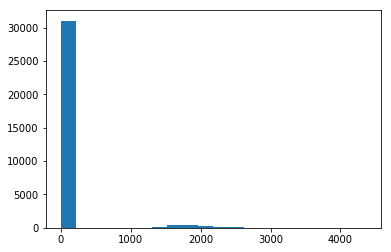

In [30]:
plt.hist(df.CapitalLoss, bins =20)


(array([ 1615.,  3940., 20544.,  5657.,   601.,   204.]),
 array([ 1.        , 17.33333333, 33.66666667, 50.        , 66.33333333,
        82.66666667, 99.        ]),
 <a list of 6 Patch objects>)

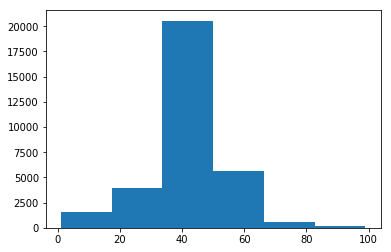

In [31]:
plt.hist(df.HoursPerWeek, bins = 6)


In [32]:
#turn HoursPerWeek from numerical into categorical by aggregating age groups
def HoursPerWeek_xform(al):
    if al < 18: return 'less 18'
    elif al <38: return '19-37'
    elif al <50: return '38-49'
    elif al <65: return '50-64'
    else: return 'above 65'

df["HoursPerWeek"] = df['HoursPerWeek'].map(HoursPerWeek_xform)


df["HoursPerWeek"].value_counts()

38-49       18850
19-37        5634
50-64        5396
less 18      1615
above 65     1066
Name: HoursPerWeek, dtype: int64

In [33]:
df.dtypes

Age              object
WorkClass        object
fnlwgt            int64
Education        object
EducationNum     object
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek     object
NativeCountry    object
Income           object
dtype: object

The followoing cells will create dummie variables for the non numerical columns we have just explored, and then drop the column used to create the dummy variables (this way we prevent collinearity)

In [34]:
#create dummies for categorical columns
df = pd.concat([df,pd.get_dummies(df['Age'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['WorkClass'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Education'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['EducationNum'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['MaritalStatus'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Occupation'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Relationship'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Race'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['HoursPerWeek'])],axis=1)


In [35]:
#Drop the columns for which I created dummies
df=df.drop(['Age',
       'WorkClass', 'Education','EducationNum',
       'MaritalStatus',
       'Occupation','Relationship','Race','Gender','HoursPerWeek'], axis=1)

In [36]:
#drop useless columns (Native country is meaningless)
df=df.drop(['NativeCountry'], axis=1)

In [37]:
df.shape

(32561, 77)

**3.2.1 scale data for numerical columns**

In [38]:
quant_features = ['fnlwgt', 'CapitalGain', 'CapitalLoss']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [39]:
#Move LABEL column (attractiveness) to the end of the dataset
cols = [col for col in df if col != 'Income']+['Income']
df = df[cols]
df.head()

,fnlwgt,CapitalGain,CapitalLoss,21-30,31-40,41-50,abvove 70,below 20,Federal-gov,Local-gov,...,Other,White,Female,Male,19-37,38-49,50-64,above 65,less 18,Income
0,-1.063594,0.148451,-0.216656,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,-1.008692,-0.145918,-0.216656,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0.245075,-0.145918,-0.216656,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,0.425795,-0.145918,-0.216656,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.408154,-0.145918,-0.216656,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [40]:
#See data shape before handling outliers
df.shape

(32561, 79)

#### 3.3 Handling outliers

In [41]:
# Handle outliers on numeric features
import scipy as sp
from scipy import stats
df = df[(np.abs(sp.stats.zscore(df[quant_features])) < 3).all(axis=1)]

In [42]:
# See data shape after handling outliers
df.shape

(30541, 79)

In [43]:
df.dtypes

fnlwgt                 float64
CapitalGain            float64
CapitalLoss            float64
21-30                    uint8
31-40                    uint8
41-50                    uint8
abvove 70                uint8
below 20                 uint8
 Federal-gov             uint8
 Local-gov               uint8
 Private                 uint8
 Self-emp-inc            uint8
 Self-emp-not-inc        uint8
 State-gov               uint8
 Unknown                 uint8
 Unknown                 uint8
 WP-NW                   uint8
 10th                    uint8
 11th                    uint8
 12th                    uint8
 1st-4th                 uint8
 5th-6th                 uint8
 7th-8th                 uint8
 9th                     uint8
 Assoc-acdm              uint8
 Assoc-voc               uint8
 Bachelors               uint8
 Doctorate               uint8
 HS-grad                 uint8
 Masters                 uint8
                        ...   
 Handlers-cleaners       uint8
 Machine

3261 - 30541 = 2020 is the number of rows, thereofre the number of outliers deleted from the dataset when handling outliers

Finally, I save the modified data set to create and test a model in a separate notebook

In [44]:
#export data set to main directory to be used in a different jupyter notebook
df.to_csv("dfprepared.csv", index=False)